Leer los datos creados en "creacion_conjunto_datos" y "creacion_json_datos"

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import seaborn as sns

In [2]:
from funciones_grafos import *

In [3]:
# locacion de los datos
carpeta_datos = "./datos/"
filename_csv = "datos_grafos.csv"
filename_json = "datos_grafos_json"

## Leer csv

In [4]:
df = pd.read_csv(carpeta_datos+filename_csv, index_col=0)
print(df.shape)

(995, 26)


In [5]:
df.head()

,nodos,aristas,numero nodos,numero aristas,densidad,grado maximo,regular,Euleriano,bipartita,bipartita completa,...,numero ciclos impares,numero ciclos base,numero ciclos pares base,numero ciclos impares base,singular,espectro adj,energias vertice,randic,mejor randic,energia
0,"[0, 1]","[(0, 1)]",2,1,1.000000,1,True,False,True,True,...,0,0,0,0,False,[ 1. -1.],[1. 1.],1.000000,1.000000,2.000000
1,"[0, 1, 2]","[(0, 1), (0, 2)]",3,2,0.666667,2,False,False,True,True,...,0,0,0,0,True,[ 1.41421356 -1.41421356 0. ],[1.41421356 0.70710678 0.70710678],1.414214,1.414214,2.828427
2,"[0, 1, 2]","[(0, 1), (0, 2), (1, 2)]",3,3,1.000000,2,True,True,False,False,...,1,1,0,1,False,[-1. 2. -1.],[1.33333333 1.33333333 1.33333333],1.500000,1.500000,4.000000
3,"[0, 1, 2, 3]","[(0, 3), (1, 3), (2, 3)]",4,3,0.500000,3,False,False,True,True,...,0,0,0,0,True,[-1.73205081 -0. 1.73205081 0. ],[0.57735027 0.57735027 0.57735027 1.73205081],1.732051,1.732051,3.464102
4,"[0, 1, 2, 3]","[(0, 1), (0, 3), (1, 2)]",4,3,0.500000,2,False,False,True,False,...,0,0,0,0,False,[-1.61803399 1.61803399 -0.61803399 0.61803399],[1.34164079 1.34164079 0.89442719 0.89442719],1.914214,2.000000,4.472136


## Leer json

In [6]:
with open(carpeta_datos + filename_json, 'r') as fin:
    lista_dict = json.load(fin)
    
print(len(lista_dict))

995


In [7]:
lista_dict[500]

{'nodos': [0, 1, 2, 3, 4, 5, 6],
 'aristas': [[0, 1],
  [0, 4],
  [0, 5],
  [1, 4],
  [1, 5],
  [1, 6],
  [2, 4],
  [2, 5],
  [3, 4],
  [3, 5],
  [4, 5]],
 'numero nodos': 7,
 'numero aristas': 11,
 'densidad': 0.5238095238095238,
 'grado maximo': 5,
 'regular': False,
 'Euleriano': False,
 'bipartita': False,
 'bipartita completa': False,
 'bipartita completa balanceada': False,
 'arbol': False,
 'vertex cover number': 3,
 'matching number': 3,
 'numero ciclos': 18,
 'numero ciclos pares': 8,
 'numero ciclos impares': 10,
 'numero ciclos base': 5,
 'numero ciclos pares base': 0,
 'numero ciclos impares base': 5,
 'singular': True,
 'espectro adj': [3.6705929771,
  0.9013879729,
  -2.1950888525,
  -1.3768920975,
  -0.0,
  0.0,
  -1.0],
 'energias vertice': [1.1961259331567469,
  1.7562811585095235,
  0.8028988427463617,
  0.8028988421132679,
  1.9348184370232044,
  1.9348184370232044,
  0.7161202554509393],
 'randic': 3.217197573656445,
 'mejor randic': 3.4494897427831788,
 'energia': 

In [8]:
def dibujar_grafo_indice(indice_grafo, figsize=(6, 6)):
    
    # crear el grafo
    G = nx.Graph()
    
    # aristas
    G.add_edges_from(lista_dict[indice_grafo]['aristas'])
    
    
    dibujar_grafo(G, figsize)

## Ver datos numericos

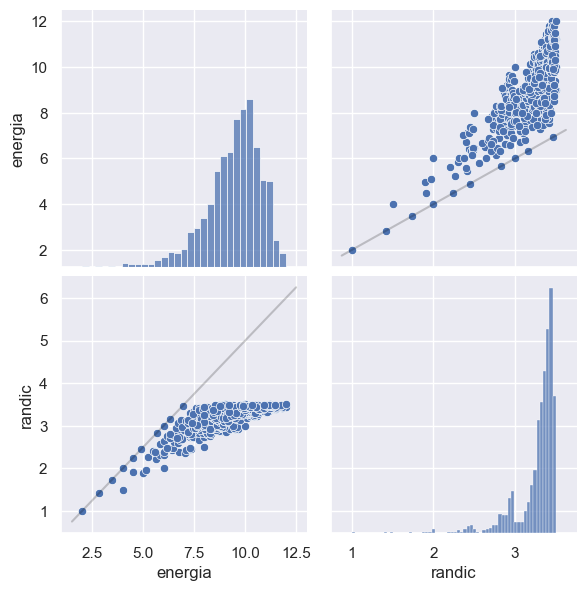

In [9]:
# delimitar las columnas a considerar
columas_numericas = ['energia', 'randic']



# scar el df
df_numerico = df[columas_numericas].copy()


# grafico
sns.set_theme()
pairplot = sns.pairplot(data = df_numerico,
             kind='scatter',
             diag_kind="hist",
             height = 3)

# grafico donde. x=randic, y=energia
ax = pairplot.axes[0, 1]
# graficar y=2x
xlim = ax.get_xlim()
x_values = [xlim[0], xlim[1]]
y_values = [2 * x for x in x_values]
ax.plot(x_values, y_values, color='black', alpha = 0.2)

# grafico donde. x=energia, y=randic
ax = pairplot.axes[1, 0]
# graficar y=(1/2)x
xlim = ax.get_xlim()
x_values = [xlim[0], xlim[1]]
y_values = [(1/2) * x for x in x_values]
ax.plot(x_values, y_values, color='black', alpha = 0.2)

plt.show()

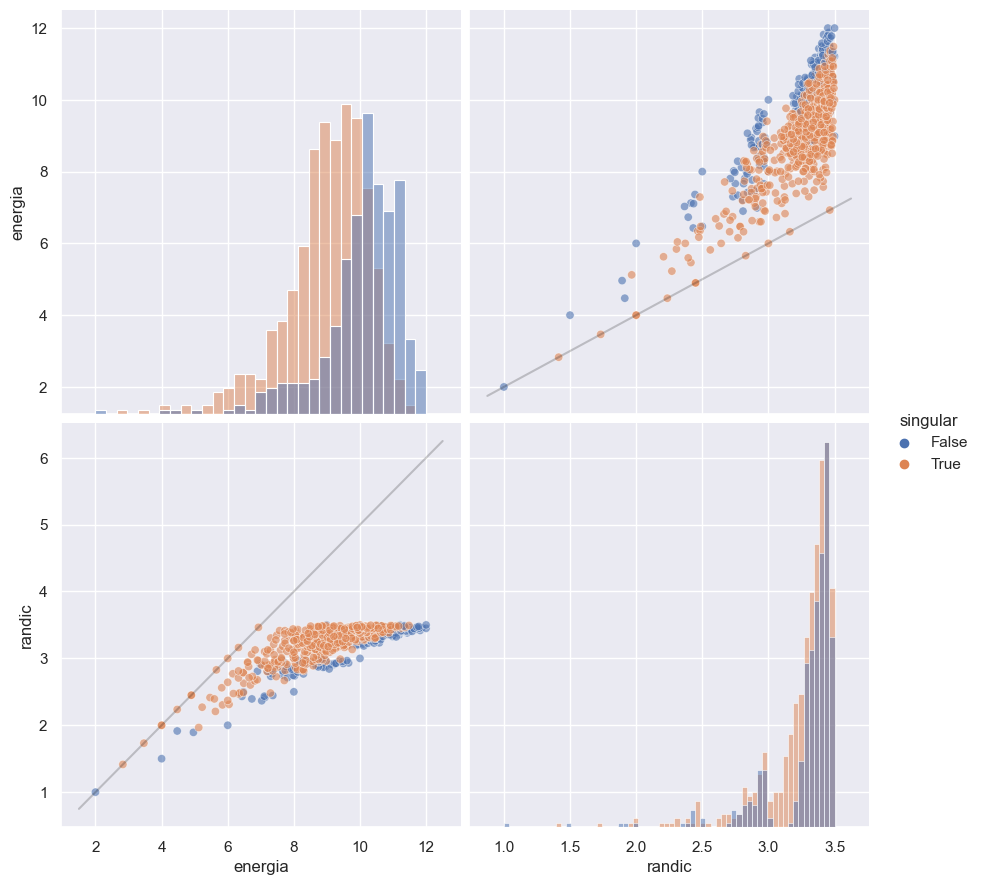

In [10]:
# delimitar las columnas a considerar
columas_numericas = ['singular', 'energia', 'randic']


# scar el df
df_numerico = df[columas_numericas].copy()


# grafico
sns.set_theme()
pairplot = sns.pairplot(data = df_numerico,
             kind='scatter',
             diag_kind="hist",
             height = 4.5,
            hue = 'singular',
            plot_kws={'alpha':0.6})

# grafico donde. x=randic, y=energia
ax = pairplot.axes[0, 1]
# graficar y=2x
xlim = ax.get_xlim()
x_values = [xlim[0], xlim[1]]
y_values = [2 * x for x in x_values]
ax.plot(x_values, y_values, color='black', alpha = 0.2)

# grafico donde. x=energia, y=randic
ax = pairplot.axes[1, 0]
# graficar y=(1/2)x
xlim = ax.get_xlim()
x_values = [xlim[0], xlim[1]]
y_values = [(1/2) * x for x in x_values]
ax.plot(x_values, y_values, color='black', alpha = 0.2)

plt.show()

## Comprobar cotas conocidas

In [11]:
# poner un epsilon, para errores numericos
epsilon = 0.0000000001

In [12]:
def graficar_desigualdad(x_graficar, y_graficar, color_grafica):
    # hace la grafica
    fig, ax = plt.subplots(figsize=(5, 5))

    sns.scatterplot(data=df, x=x_graficar, y=y_graficar, hue=color_grafica)
    # grafica y = 2x
    xlim = ax.get_xlim()
    x_values = [xlim[0], xlim[1]]
    y_values = [x for x in x_values]
    ax.plot(x_values, y_values, color='black', alpha = 0.4)


    plt.show()

In [13]:
# 2 sqrt(m) <= E(G)
np.all([
    2* np.sqrt(grafo['numero aristas']) <= grafo['energia'] + epsilon
    for grafo in lista_dict])

True

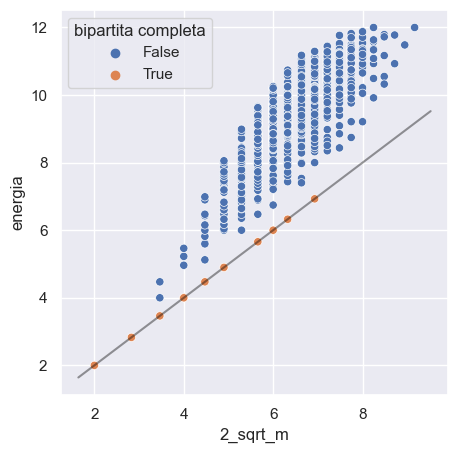

In [14]:
df['2_sqrt_m'] = 2*np.sqrt(df['numero aristas'])

graficar_desigualdad(x_graficar= "2_sqrt_m",
                    y_graficar= "energia",
                    color_grafica= 'bipartita completa')

In [15]:
# 2 R(G) <= E(G)
np.all([
    2*grafo['randic'] <= grafo['energia'] + epsilon
    for grafo in lista_dict])

True

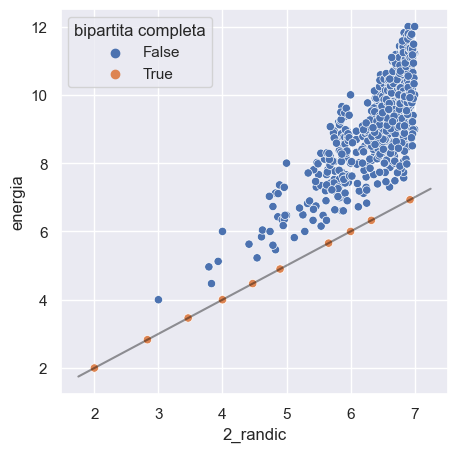

In [16]:
df['2_randic'] = 2*df['randic']

graficar_desigualdad(x_graficar= "2_randic",
                    y_graficar= "energia",
                    color_grafica= 'bipartita completa')

In [17]:
# 2 u(G) <= E(G)
np.all([
    2*grafo['matching number'] <= grafo['energia'] + epsilon
    for grafo in lista_dict])

True

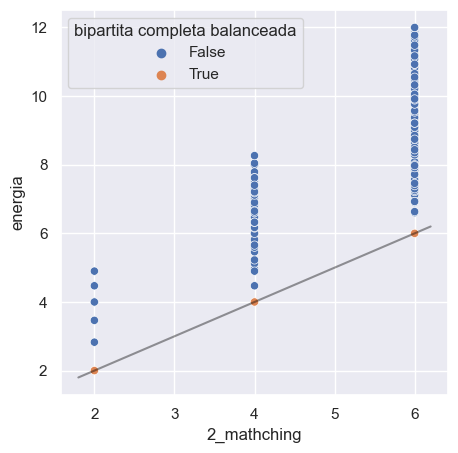

In [18]:
df['2_mathching'] = 2*df['matching number']

graficar_desigualdad(x_graficar= "2_mathching",
                    y_graficar= "energia",
                    color_grafica= 'bipartita completa balanceada')

In [19]:
# u(G) <= t(G)
np.all([
    grafo['matching number'] <= grafo['vertex cover number']
    for grafo in lista_dict])

True

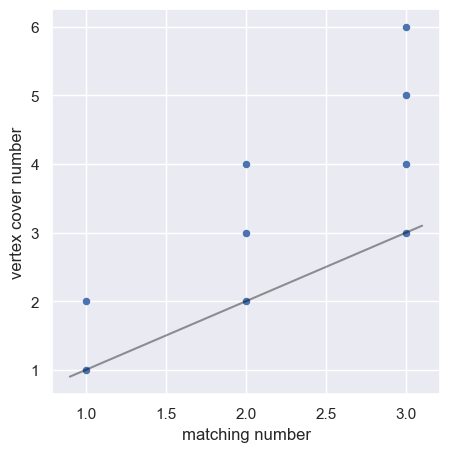

In [20]:
graficar_desigualdad(x_graficar= "matching number",
                    y_graficar= "vertex cover number",
                    color_grafica= None)

## Empezar a buscar cosas

$\tau(G)$  - vertex cover number

$c_o(G)$ - numero de ciclos impares

$\mu(G)$ - matching number

In [21]:
# t(G) - c0 <= n/2
np.all([
    grafo['vertex cover number'] - grafo['numero ciclos impares'] <= grafo['numero nodos']/2
    for grafo in lista_dict])

True

In [22]:
# 2 (t(G) - c0) <= E(G) (esto ya es un resultado conocido)
np.all([
    2*(grafo['vertex cover number'] - grafo['numero ciclos impares']) <= grafo['energia']
    for grafo in lista_dict])

True

Pero creo que esto no es tan util, pues es peor cota que el matching number

In [23]:
# t(G) - c0 <= u(G)
np.all([
    grafo['vertex cover number'] - grafo['numero ciclos impares'] <= grafo['matching number']
    for grafo in lista_dict])

True

$\tau(G) - c_o(G) \leq \mu(G)$

Demostracion:

nduccion en $c_o(G)$. 

Si $c_o(G) = 0$ entonces $G$ es bipartita y se tiene $\tau(G) = \mu(G)$.

Hipotesis de induccion: La desigualdad se cumple siempre que $c_o(G) \leq k-1$.

Sea $G$ un grafo tal que $c_o(G) = k$. 

Sea $v \in G$ tal que se encuentra en un ciclo impar de $G$.

Sea $H = G - v$.

Es obvio que que $c_o(H) < c_o(G)$ luego $c_o(H) \leq c_o(G) - 1 = k-1$ y entonces se cumple:

$\tau(H) - c_o(H) \leq \mu(H)$


Sea $W$ un vertex minimo de $H$, luego $W \cup {v}$ es un vertex cover de $G$.
Por lo tanto, es claro que $\tau(G) \leq |W \cup {v}| = \tau(H) + 1$.
Es decir, $\tau(G) - 1 \leq \tau(H)$ (1)


Notar que como $c_o(H) \leq c_o(G) - 1$, entonces $-c_o(G) + 1 \leq - c_o(H)$ (2)


Finalmente, sea $U$ un matching maximo de $H$, entonces $U$ es un matching de $G$, luego
$\mu(H) = |U| \leq \mu(G)$

Juntanto todo (sumando (1) y (2) y despues usando (3))

$\tau(G) -c_o(G) \leq \tau(H) - c_o(H) \leq \mu(H) \leq \mu(G) $

Es decir

$\tau(G) - c_o(G) \leq \mu(G)$

Fin de la demostracion

Entonces, la cota:
    
$2 \tau(G) - 2 c_o(G) \leq \mathcal E(G)$

Solo viene de 

$2 \tau(G) - 2 c_o(G) \leq 2 \mu (G) \leq  \mathcal E(G)$

### Conjetura:

$2 \tau(G) \leq \mathcal E(G)$

In [24]:
np.all([
    2*grafo['vertex cover number'] <= grafo['energia'] + epsilon
    for grafo in lista_dict])

True

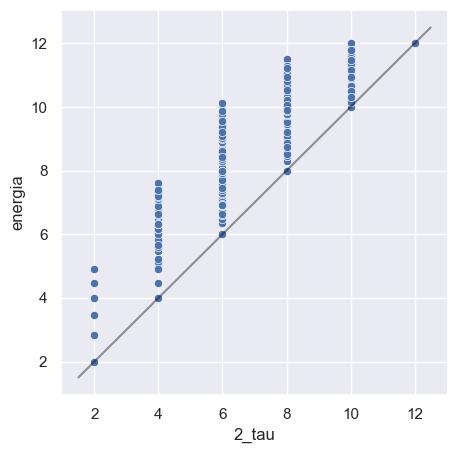

In [25]:
df['2_tau'] = 2*df['vertex cover number']

graficar_desigualdad(x_graficar= '2_tau',
                    y_graficar= 'energia',
                    color_grafica= None)

In [26]:
# ver la igualdad
[idx_g for idx_g, grafo in enumerate(lista_dict) if
 np.isclose(grafo['energia'], 2*grafo['vertex cover number'])]

[0, 2, 6, 8, 29, 108, 109, 137, 141, 994]

In [66]:
# ver datos regulares
[idx_g for idx_g, grafo in enumerate(lista_dict) if
 grafo['regular']]

[0, 2, 6, 8, 16, 29, 48, 108, 109, 137, 141, 185, 913, 914, 994]

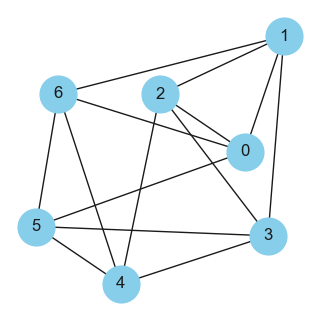

In [73]:
dibujar_grafo_indice(913, figsize=(3, 3))

In [54]:
df[np.isclose(df['energia'], 2*df['vertex cover number'])]

,nodos,aristas,numero nodos,numero aristas,densidad,grado maximo,regular,Euleriano,bipartita,bipartita completa,...,singular,espectro adj,energias vertice,randic,mejor randic,energia,2_sqrt_m,2_randic,2_mathching,2_tau
0,"[0, 1]","[(0, 1)]",2,1,1.000000,1,True,False,True,True,...,False,[ 1. -1.],[1. 1.],1.0,1.0,2.0,2.000000,2.0,2,2
2,"[0, 1, 2]","[(0, 1), (0, 2), (1, 2)]",3,3,1.000000,2,True,True,False,False,...,False,[-1. 2. -1.],[1.33333333 1.33333333 1.33333333],1.5,1.5,4.0,3.464102,3.0,2,4
6,"[0, 1, 2, 3]","[(0, 1), (0, 3), (1, 2), (2, 3)]",4,4,0.666667,2,True,True,True,True,...,True,[-2. 2. -0. -0.],[1.00000001 1.00000001 1.00000001 1.00000001],2.0,2.0,4.0,4.000000,4.0,4,4
8,"[0, 1, 2, 3]","[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]",4,6,1.000000,3,True,False,False,False,...,False,[-1. 3. -1. -1.],[1.5 1.5 1.5 1.5],2.0,2.0,6.0,4.898979,4.0,4,6
29,"[0, 1, 2, 3, 4]","[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3...",5,10,1.000000,4,True,True,False,False,...,False,[-1. 4. -1. -1. -1.],[1.6 1.6 1.6 1.6 1.6],2.5,2.5,8.0,6.324555,5.0,4,8
108,"[0, 1, 2, 3, 4, 5]","[(0, 1), (0, 2), (0, 3), (1, 4), (1, 5), (2, 3...",6,9,0.600000,3,True,False,False,False,...,True,[ 3. 1. -2. -2. -0. -0.],[1.33333333 1.33333333 1.33333334 1.33333333 1...,3.0,3.0,8.0,6.000000,6.0,6,8
109,"[0, 1, 2, 3, 4, 5]","[(0, 1), (0, 3), (0, 5), (1, 2), (1, 4), (2, 3...",6,9,0.600000,3,True,False,True,True,...,True,[-3. 3. 0. 0. -0. -0.],[1.00000002 1. 1.00036366 0.98795497 0...,3.0,3.0,6.0,6.000000,6.0,6,6
137,"[0, 1, 2, 3, 4, 5]","[(0, 1), (0, 2), (0, 4), (0, 5), (1, 2), (1, 3...",6,12,0.800000,4,True,True,False,False,...,True,[ 4. 0. -2. -2. 0. 0.],[1.33333333 1.33333334 1.33333333 1.33333333 1...,3.0,3.0,8.0,6.928203,6.0,6,8
141,"[0, 1, 2, 3, 4, 5]","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2...",6,15,1.000000,5,True,False,False,False,...,False,[-1. 5. -1. -1. -1. -1.],[1.66666667 1.66666667 1.66666667 1.66666667 1...,3.0,3.0,10.0,7.745967,6.0,6,10
994,"[0, 1, 2, 3, 4, 5, 6]","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",7,21,1.000000,6,True,True,False,False,...,False,[-1. 6. -1. -1. -1. -1. -1.],[1.71428571 1.71428571 1.71428571 1.71428571 1...,3.5,3.5,12.0,9.165151,7.0,6,12
